# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Seed set for sanity checks
np.random.seed(1186)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['clifton', 'vicuna', 'pevek', 'cape town', 'puerto ayora', 'wanning', 'oranjemund', 'tabukiniberu', 'kaduqli', 'tondi', 'paso de carrasco', 'nome', 'mataura', 'hithadhoo', 'beringovskiy', 'port elizabeth', 'callaway', 'isangel', 'stornoway', 'mar del plata', 'albany', 'busselton', 'hilo', 'bengkulu', 'bontang', 'vanavara', 'khasan', 'nikolskoye', 'sacalaz', 'la ronge', 'victoria', 'lebu', 'bambous virieux', 'atuona', 'hermanus', 'pak chong', 'taolanaro', 'faridpur', 'cherskiy', 'gusau', 'husavik', 'port hardy', 'hobart', 'butaritari', 'kavieng', 'tiksi', 'ndiekro', 'kavaratti', 'ushuaia', 'herat', 'zhangjiakou', 'barrow', 'itarema', 'falealupo', 'kununurra', 'bluff', 'vardo', 'tasiilaq', 'thabazimbi', 'salym', 'mys shmidta', 'bredasdorp', 'buala', 'ixtapa', 'mahebourg', 'sao joao da barra', 'cayenne', 'hambantota', 'moirang', 'erenhot', 'thilogne', 'amderma', 'tiarei', 'kamaishi', 'syracuse', 'kapoeta', 'barentsburg', 'ponta do sol', 'hasaki', 'loa janan', 'nador', 'belushya guba', 'b

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Call API weather check
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='
count = 1
count2 = 1

# Empty lists to populate
clouds = []
countries = []
humidity = []
lat = []
long = []
temp = []
wind = []
date = []
city_list = []

print(f'Beginning Data Retrieval')
print(f'--------------------------------------------')

for city in cities:
    try:
        response = requests.get(base_url + city).json()
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        city_list.append(city)
        print(f"Processing record {count} of Set {count2} | {city}")
        count=count+1
        if count>=51:
            count=1
            count2=count2+1
    except:
        print("No such city, skipping this one...")
    
    
print("----------------------API Pull Complete----------------------")

Beginning Data Retrieval
--------------------------------------------
Processing record 1 of Set 1 | clifton
Processing record 2 of Set 1 | vicuna
Processing record 3 of Set 1 | pevek
Processing record 4 of Set 1 | cape town
Processing record 5 of Set 1 | puerto ayora
Processing record 6 of Set 1 | wanning
Processing record 7 of Set 1 | oranjemund
No such city, skipping this one...
Processing record 8 of Set 1 | kaduqli
Processing record 9 of Set 1 | tondi
Processing record 10 of Set 1 | paso de carrasco
Processing record 11 of Set 1 | nome
Processing record 12 of Set 1 | mataura
Processing record 13 of Set 1 | hithadhoo
Processing record 14 of Set 1 | beringovskiy
Processing record 15 of Set 1 | port elizabeth
Processing record 16 of Set 1 | callaway
Processing record 17 of Set 1 | isangel
Processing record 18 of Set 1 | stornoway
Processing record 19 of Set 1 | mar del plata
Processing record 20 of Set 1 | albany
Processing record 21 of Set 1 | busselton
Processing record 22 of Set 1

Processing record 38 of Set 4 | necochea
Processing record 39 of Set 4 | longyearbyen
Processing record 40 of Set 4 | ancud
Processing record 41 of Set 4 | teguise
Processing record 42 of Set 4 | port blair
Processing record 43 of Set 4 | san cristobal
Processing record 44 of Set 4 | abha
No such city, skipping this one...
Processing record 45 of Set 4 | iqaluit
Processing record 46 of Set 4 | urucara
Processing record 47 of Set 4 | buckingham
Processing record 48 of Set 4 | port alfred
Processing record 49 of Set 4 | korla
Processing record 50 of Set 4 | rundu
Processing record 1 of Set 5 | souillac
Processing record 2 of Set 5 | las margaritas
Processing record 3 of Set 5 | walvis bay
Processing record 4 of Set 5 | ulladulla
No such city, skipping this one...
Processing record 5 of Set 5 | turan
Processing record 6 of Set 5 | dali
Processing record 7 of Set 5 | santa catarina de tepehuanes
Processing record 8 of Set 5 | lavrentiya
Processing record 9 of Set 5 | saldanha
Processing re

Processing record 22 of Set 8 | lahijan
Processing record 23 of Set 8 | yenagoa
Processing record 24 of Set 8 | mogadishu
Processing record 25 of Set 8 | pocao de pedras
Processing record 26 of Set 8 | flinders
Processing record 27 of Set 8 | kenai
Processing record 28 of Set 8 | tabou
Processing record 29 of Set 8 | egvekinot
No such city, skipping this one...
Processing record 30 of Set 8 | konevo
No such city, skipping this one...
Processing record 31 of Set 8 | luau
Processing record 32 of Set 8 | santa marta
Processing record 33 of Set 8 | santana
Processing record 34 of Set 8 | dicabisagan
Processing record 35 of Set 8 | marathon
Processing record 36 of Set 8 | smolenka
Processing record 37 of Set 8 | mutuipe
Processing record 38 of Set 8 | kahului
Processing record 39 of Set 8 | vorontsovka
Processing record 40 of Set 8 | senneterre
Processing record 41 of Set 8 | mandalgovi
Processing record 42 of Set 8 | onda
Processing record 43 of Set 8 | pandan
Processing record 44 of Set 8

Processing record 9 of Set 12 | valparaiso
Processing record 10 of Set 12 | tokur
No such city, skipping this one...
Processing record 11 of Set 12 | gagarin
Processing record 12 of Set 12 | boyolangu
Processing record 13 of Set 12 | jalu
Processing record 14 of Set 12 | ekibastuz
Processing record 15 of Set 12 | teguldet
Processing record 16 of Set 12 | wedi
Processing record 17 of Set 12 | taldan
Processing record 18 of Set 12 | saint thomas mount
No such city, skipping this one...
----------------------API Pull Complete----------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_lists = {
             "Cloudiness":clouds, 
             "Country":countries,
             "Humidity":humidity,
             "Latitude":lat,
             "Longitude":long,
             "Temperature (F)":temp,
             "Wind Speed":wind,
             "Date": date,
             "City": city_list,
}

weather_df = pd.DataFrame(weather_lists)
weather_df.to_csv('cities.csv', index = True, index_label = 'city_id')
weather_df

,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature (F),Wind Speed,Date,City
0,1,US,35,40.8584,-74.1638,60.80,6.91,1620353610,clifton
1,75,CL,88,-30.0319,-70.7081,59.00,5.75,1620353611,vicuna
2,9,RU,80,69.7008,170.3133,29.70,2.59,1620353611,pevek
3,75,ZA,94,-33.9258,18.4232,61.00,13.80,1620353341,cape town
4,4,EC,89,-0.7393,-90.3518,73.99,5.70,1620353612,puerto ayora
...,...,...,...,...,...,...,...,...,...
563,100,KZ,42,51.6667,75.3667,57.63,12.50,1620353820,ekibastuz
564,100,RU,75,57.3064,88.1667,59.97,9.40,1620353820,teguldet
565,100,ID,74,-7.7431,110.5794,82.42,3.36,1620353820,wedi
566,96,RU,86,53.6667,124.8000,39.96,6.02,1620353821,taldan


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()

,Cloudiness,Humidity,Latitude,Longitude,Temperature (F),Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,58.225352,71.348592,21.295663,19.725843,61.232588,7.465211,1.620354e+09
std,38.867140,20.969407,33.342937,89.807036,17.770486,5.037083,8.366821e+01
min,0.000000,4.000000,-54.800000,-179.166700,14.000000,0.630000,1.620353e+09
25%,20.000000,60.000000,-6.295625,-59.718150,46.927500,3.440000,1.620354e+09
50%,75.000000,75.000000,25.942500,27.527650,63.280000,6.210000,1.620354e+09
75%,98.000000,87.250000,50.270575,96.396375,76.412500,10.322500,1.620354e+09
max,100.000000,100.000000,78.218600,179.316700,90.520000,28.770000,1.620354e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

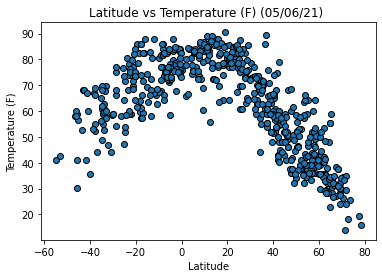

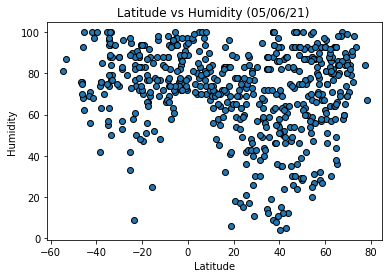

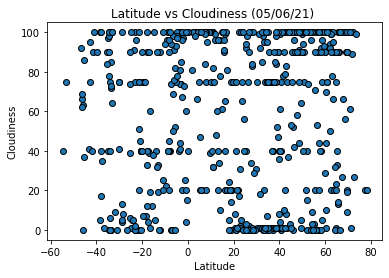

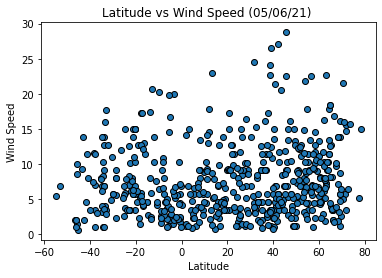

In [7]:
y_values = ['Temperature (F)', 'Humidity', 'Cloudiness', 'Wind Speed']
for y_axis in y_values:
    x = weather_df['Latitude']
    y = weather_df[y_axis]
    plt.scatter(x,y, edgecolor='black')
    plt.xlabel('Latitude')
    plt.ylabel(y_axis)
    plt.title('Latitude vs ' + y_axis + ' (%s) ' % time.strftime("%x"))
    plt.show()

## Linear Regression

In [8]:
# Split between northern and southern hemisphere
north = weather_df.loc[(weather_df['Latitude']>0)]
south = weather_df.loc[(weather_df['Latitude']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Fit line eq: y = -0.86x + 92.33
R-squared: -0.8859070901490382


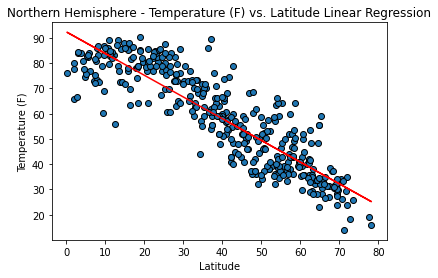

Fit line eq: y = 0.06x + 65.53
R-squared: 0.05569531233639638


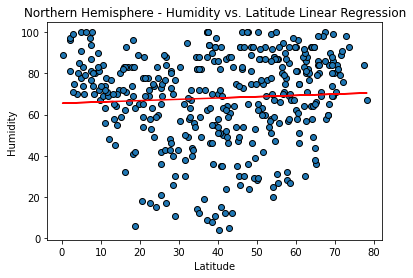

Fit line eq: y = 0.13x + 54.75
R-squared: 0.062139979586445994


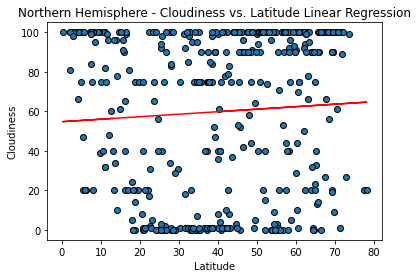

Fit line eq: y = 0.04x + 6.02
R-squared: 0.16220487315659232


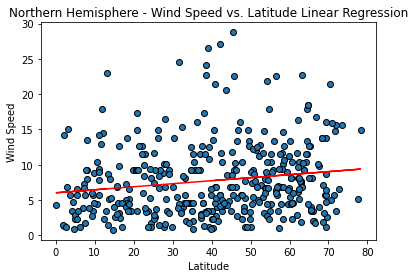

Fit line eq: y = 0.59x + 80.87
R-squared: 0.6988716918620358


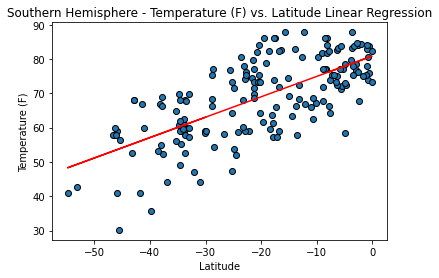

Fit line eq: y = 0.09x + 80.37
R-squared: 0.08150531595275436


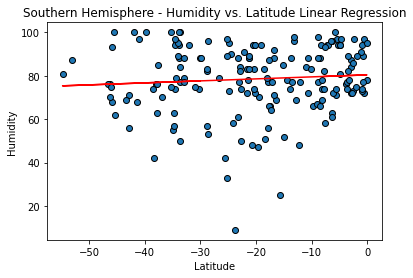

Fit line eq: y = 0.19x + 58.55
R-squared: 0.07195940210928971


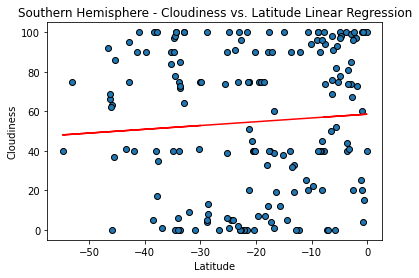

Fit line eq: y = -0.02x + 6.39
R-squared: -0.06601799080185672


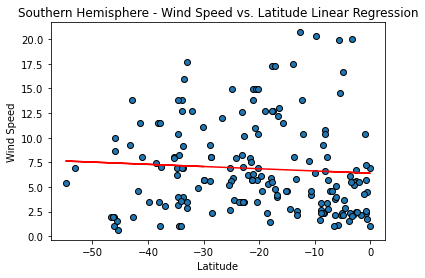

In [12]:
# Northern Hemisphere Regression Lines
y_values = ['Temperature (F)', 'Humidity', 'Cloudiness', 'Wind Speed']
for y_axis in y_values:
    x = north['Latitude']
    y = north[y_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, edgecolor='black')
    plt.plot(x,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_axis)
    plt.title('Northern Hemisphere - ' + y_axis + ' vs. Latitude Linear Regression')
    print(f'Fit line eq: {line_eq}')
    print(f'R-squared: {rvalue}')
    plt.show()
    
# Southern Hemisphere Regression Lines
for y_axis in y_values:
    x = south['Latitude']
    y = south[y_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, edgecolor = 'black')
    plt.plot(x,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_axis)
    plt.title('Southern Hemisphere - ' + y_axis + ' vs. Latitude Linear Regression')
    print(f'Fit line eq: {line_eq2}')
    print(f'R-squared: {rvalue}')
    plt.show()